In [1]:
from Drawer import ImageDrawer
from Find_tabletop import HexagonDetector
from roboflow import Roboflow
import numpy as np

In [8]:
rf = Roboflow(api_key="0TVwyZuH7ZvyGtzoNC7B")
project = rf.workspace().project("ankh_project")
model = project.version(1).model

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
class Project:
    def __init__(self):
        self.model = []
        self.centers = []
        self.deploy_model()
        self.detector = HexagonDetector()
        self.image_drawer = ImageDrawer(640, 640, hex_size=36)

    def predict(self, image):
        self.centers = self.detector.find_hexagons(image)
        if len(self.centers) == 0:
            raise Exception("No se detectaron hexágonos")

    def draw(self, image):
        self.image_drawer.draw_image(image)

    def deploy_model(self):
        rf = Roboflow(api_key="0TVwyZuH7ZvyGtzoNC7B")
        project = rf.workspace().project("ankh_project")
        self.model = project.version(1).model

    def predict_and_draw(self, image):
        result=self.model.predict(image, confidence=40, overlap=30).json()
        if len(result['predictions']) == 0:
            print("No se detectaron estatuillas")
        else:
            for i in range(0, len(result['predictions'])):
                x = result['predictions'][i]['x']
                height = result['predictions'][i]['height']
                y = result['predictions'][i]['y'] - (height//2)*0.6
                closest_center = min(self.centers, key=lambda center: ((center[0] - x) ** 2 + (center[1] - y) ** 2) ** 0.5)
                
                if result['predictions'][i]['class'] == 'amon':
                    self.image_drawer.draw_square(closest_center, size=50, color=(255, 0, 0))
                elif result['predictions'][i]['class'] == 'isis':
                    self.image_drawer.draw_hexagon_object(closest_center, size=50)
                elif result['predictions'][i]['class'] == 'amon_follower':
                    self.image_drawer.draw_square(closest_center, size=20, color=(255, 0, 0))
                elif result['predictions'][i]['class'] == 'isis_follower':
                    self.image_drawer.draw_hexagon_object(closest_center, size=20)

In [9]:
# infer on an image hosted elsewhere
# print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())
# infer on a local image
result=model.predict("prueba.jpg", confidence=40, overlap=30).json()
#predictions=dict(result['predictions'][0])
print(result)
#print(predictions)

{'predictions': [{'x': 1012, 'y': 257, 'width': 314, 'height': 457, 'confidence': 0.8624465465545654, 'class': 'amon', 'class_id': 0, 'image_path': 'prueba.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 1158, 'y': 780, 'width': 188, 'height': 239, 'confidence': 0.8564779758453369, 'class': 'amon_follower', 'class_id': 1, 'image_path': 'prueba.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 691, 'y': 433, 'width': 181, 'height': 222, 'confidence': 0.8396176099777222, 'class': 'isis_follower', 'class_id': 3, 'image_path': 'prueba.jpg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 311, 'y': 373, 'width': 596, 'height': 738, 'confidence': 0.764732837677002, 'class': 'isis', 'class_id': 2, 'image_path': 'prueba.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '1468', 'height': '1215'}}


In [20]:
print(len(result['predictions']))
print(result['predictions'][3]['class'])
print(result['predictions'][0]['bbox'])
print(result['predictions'][0]['y'])
print(result['predictions'][0]['width'])
print(result['predictions'][0]['height'])

4
isis


KeyError: 'bbox'

In [3]:
# visualize your prediction
model.predict("prueba.jpg", confidence=40, overlap=30).save("prediction.jpg")

La cantidad de hexágonos detectados en la imagen son: 69


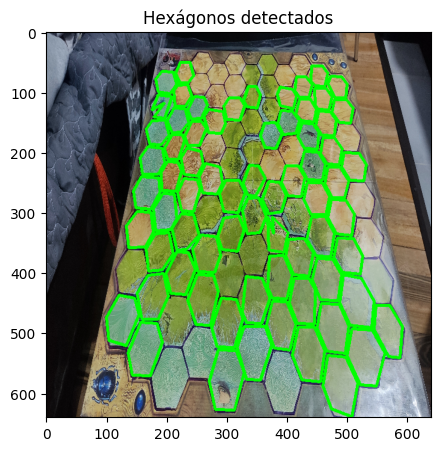

In [2]:
detector = HexagonDetector("tablero.jpg")
centers=detector.find_hexagons()

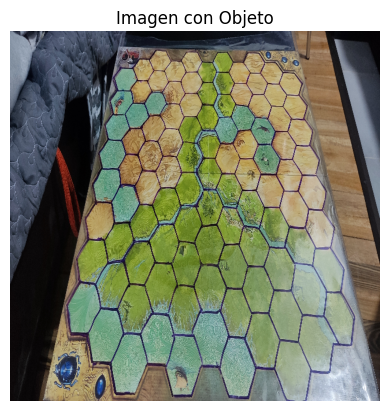

In [3]:
# Crear una instancia de la clase ImageDrawer con dimensiones 500x500 y un tamaño de hexágono de 30 píxeles
drawer = ImageDrawer(640, 640, hex_size=36)
drawer.draw_image("tablero.jpg")
# Mostrar la imagen inicial con el tablero de hexágonos
drawer.show_image()

(436, 535)


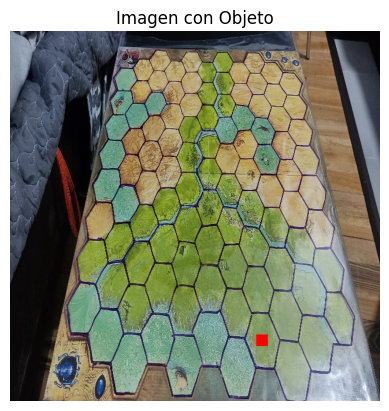

In [4]:
# Dibujar un cuadrado en la posición (100, 200) con tamaño 50 y color negro
drawer.draw_square(centers[3], size=20, color=(255, 0, 0))

# Mostrar la imagen resultante con el hexágono
drawer.show_image()

(126, 478)


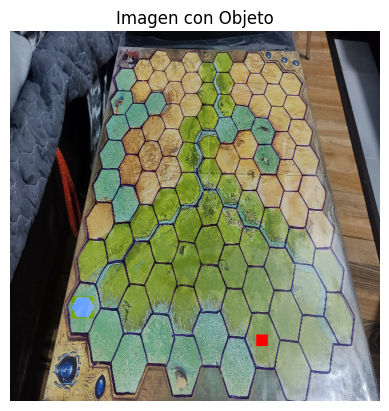

In [5]:
# Dibujar un triángulo en la posición (100, 200) con tamaño 50 y color negro
drawer.draw_hexagon_object(centers[10], size=50)

# Mostrar la imagen resultante con el triángulo
drawer.show_image()

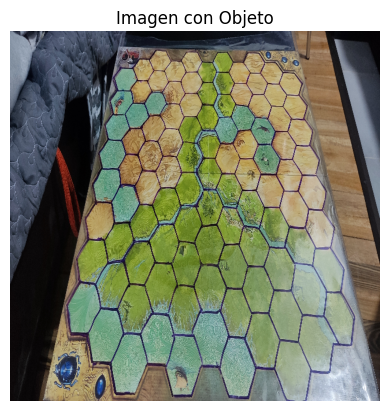

In [7]:
# Eliminar el hexágono en la posición (100, 200) con tamaño 50
drawer.remove_object(centers[3], size=(50, 50))
drawer.show_image()